# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")

coffee_df.head()


,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


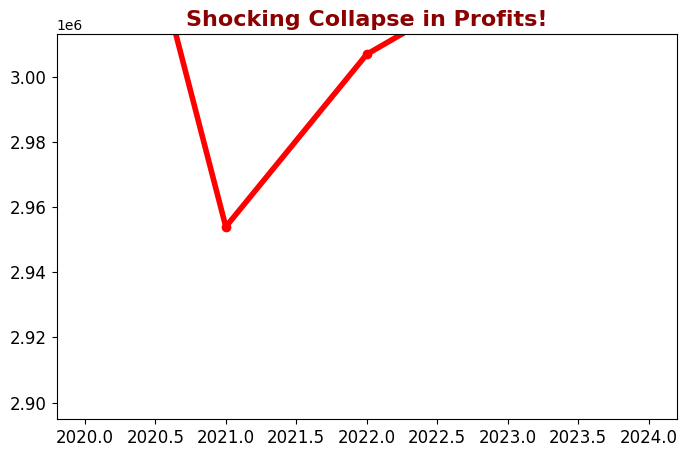

In [16]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Write your notes about bad chart #1 here:
# The y axis is truncated 
# No labels for axes
# Misleading title


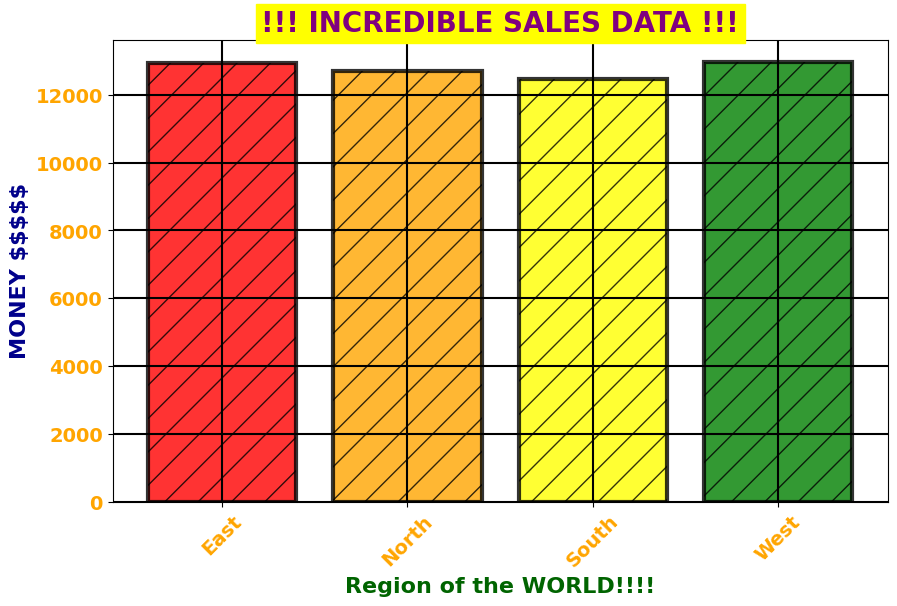

In [17]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()


colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()


### Write your notes about bad chart #2 here:
# Misleading titles and labels
# Excessive "chartjunk" with diagonal lines, highlighted title with exclamation points make it very distracting


## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


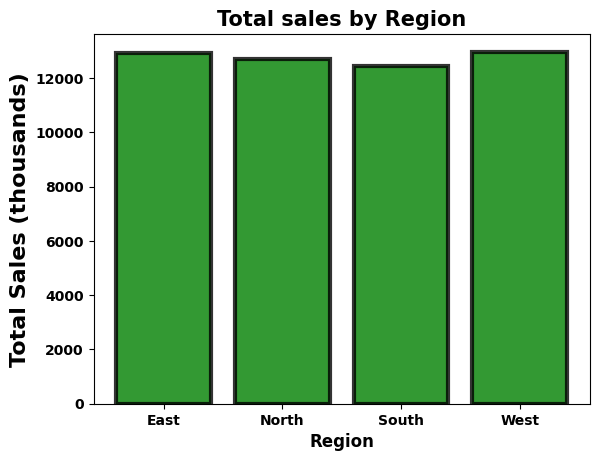

In [ ]:
# Your GOOD visualization(s) here
# corrected title variable, untruncated y-axis, appropriate color
Total_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()
# set a single, appropriate color for the bars
colors = ['green']

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
color=colors, edgecolor="black", linewidth=3, alpha=0.8)
# included clear, defined labels for title and axes
plt.title("Total sales by Region", fontsize=15, fontweight="bold", color="black")
plt.xlabel("Region", fontsize=12, fontweight="bold", color="black") 
plt.ylabel("Total Sales (thousands)", fontsize=16, fontweight="bold", color="black")
# used a clean, simple grid
plt.xticks(fontsize=10, fontweight="bold", color="black")
plt.yticks(fontsize=10, fontweight="bold", color="black")
plt.show()





In [19]:

# Identify the lowest selling item per year
lowest_selling_item_per_year = coffee_df.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

lowest_selling_item_per_year = lowest_selling_item_per_year.loc[lowest_selling_item_per_year.groupby('Year')['Sales'].idxmin()]

print(lowest_selling_item_per_year)




    Year  Category   Sales
4   2020       Tea  546989
8   2021  Pastries  542905
13  2022  Pastries  557866
19  2023       Tea  555502
24  2024       Tea  595736


In [20]:
# Identify the highest selling item per year
highest_selling_item_per_year = coffee_df.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

highest_selling_item_per_year = highest_selling_item_per_year.loc[highest_selling_item_per_year.groupby('Year')['Sales'].idxmax()]

print(highest_selling_item_per_year)

    Year  Category   Sales
2   2020    Lattes  661635
6   2021  Espresso  625635
10  2022     Beans  655475
18  2023  Pastries  656322
20  2024     Beans  686952


In [33]:
highest_selling_item_per_year = coffee_df.loc[coffee_df.groupby('Year')['Sales'].idxmax()]
print(highest_selling_item_per_year)

     Year     Month Region  Category  Sales   Profit
159  2020    August  South     Beans  23320  8151.36
394  2021    August  North     Beans  23976  7004.73
710  2022  December  North  Espresso  24873  5297.88
945  2023  December   West  Espresso  24093  8078.45
975  2024   January  South  Espresso  23956  8690.12


<function matplotlib.pyplot.show(close=None, block=None)>

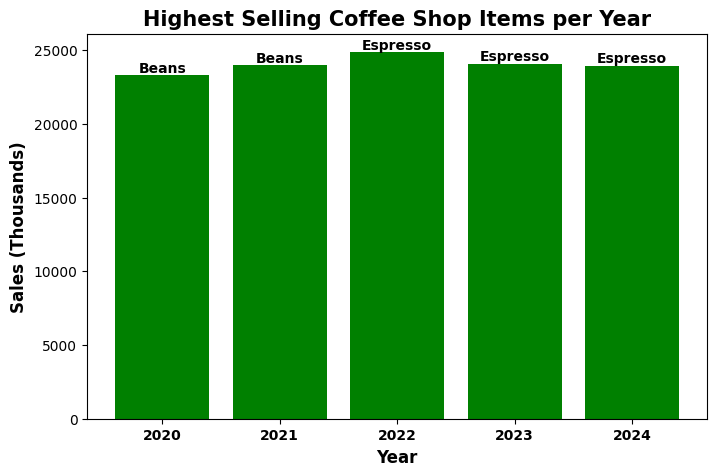

In [ ]:
# Plot highest selling items per year
# Wanted to be more precise with the visualization of highest selling items per year
plt.figure(figsize=(8,5))
plt.bar(highest_selling_item_per_year['Year'], highest_selling_item_per_year['Sales'], color='green', linewidth=2)

# made clear, defined labels for title and axes
# Used same, consistent colors
plt.xlabel('Year', fontsize=12, fontweight="bold", color="black")
plt.ylabel('Sales (Thousands)', fontsize=12, fontweight="bold", color="black")
plt.title('Highest Selling Coffee Shop Items per Year', fontsize=15, fontweight="bold", color="black")

#adding item labels on top of bars to indicate high sales   
for index, row in highest_selling_item_per_year.iterrows():
    plt.text(row['Year'], row['Sales'], row['Category'], ha='center', va='bottom', fontsize=10, fontweight="bold", color="black") 
    
plt.xticks(highest_selling_item_per_year['Year'], fontsize=10, fontweight="bold", color="black")    
plt.show      

<function matplotlib.pyplot.show(close=None, block=None)>

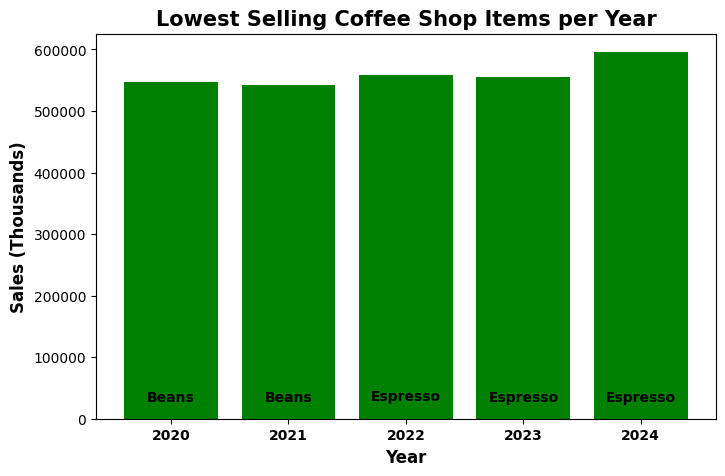

In [32]:
# Plot lowest selling items per year
# Wanted to be more precise with the visualization of lowest selling items per year
plt.figure(figsize=(8,5))
plt.bar(lowest_selling_item_per_year['Year'], lowest_selling_item_per_year['Sales'], color='green', linewidth=2)

# made clear, defined labels for title and axes
plt.xlabel('Year', fontsize=12, fontweight="bold", color="black")
plt.ylabel('Sales (Thousands)', fontsize=12, fontweight="bold", color="black")
plt.title('Lowest Selling Coffee Shop Items per Year', fontsize=15, fontweight="bold", color="black")

#adding item labels on bottom of bars to indicate low sales
#used same, consistent colors
for index, row in highest_selling_item_per_year.iterrows():
    plt.text(row['Year'], row['Sales'], row['Category'], ha='center', va='bottom', fontsize=10, fontweight="bold", color="black") 
    
plt.xticks(lowest_selling_item_per_year['Year'], fontsize=10, fontweight="bold", color="black")    
plt.show      